Importing the descripencies

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [ ]:
#Loading the dataset to a Pandas DataFrame
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path="/content/drive/MyDrive/CreditCardData.csv"
df=pd.read_csv(path)

In [ ]:
# Replace incorrect values with the correct date
df['Date'] = df['Date'].replace({'15-Oct-20': '14-Oct-20', '16-Oct-20': '14-Oct-20'})

# Verify the changes
df['Date'].unique()

array(['14-Oct-20', '13-Oct-20'], dtype=object)

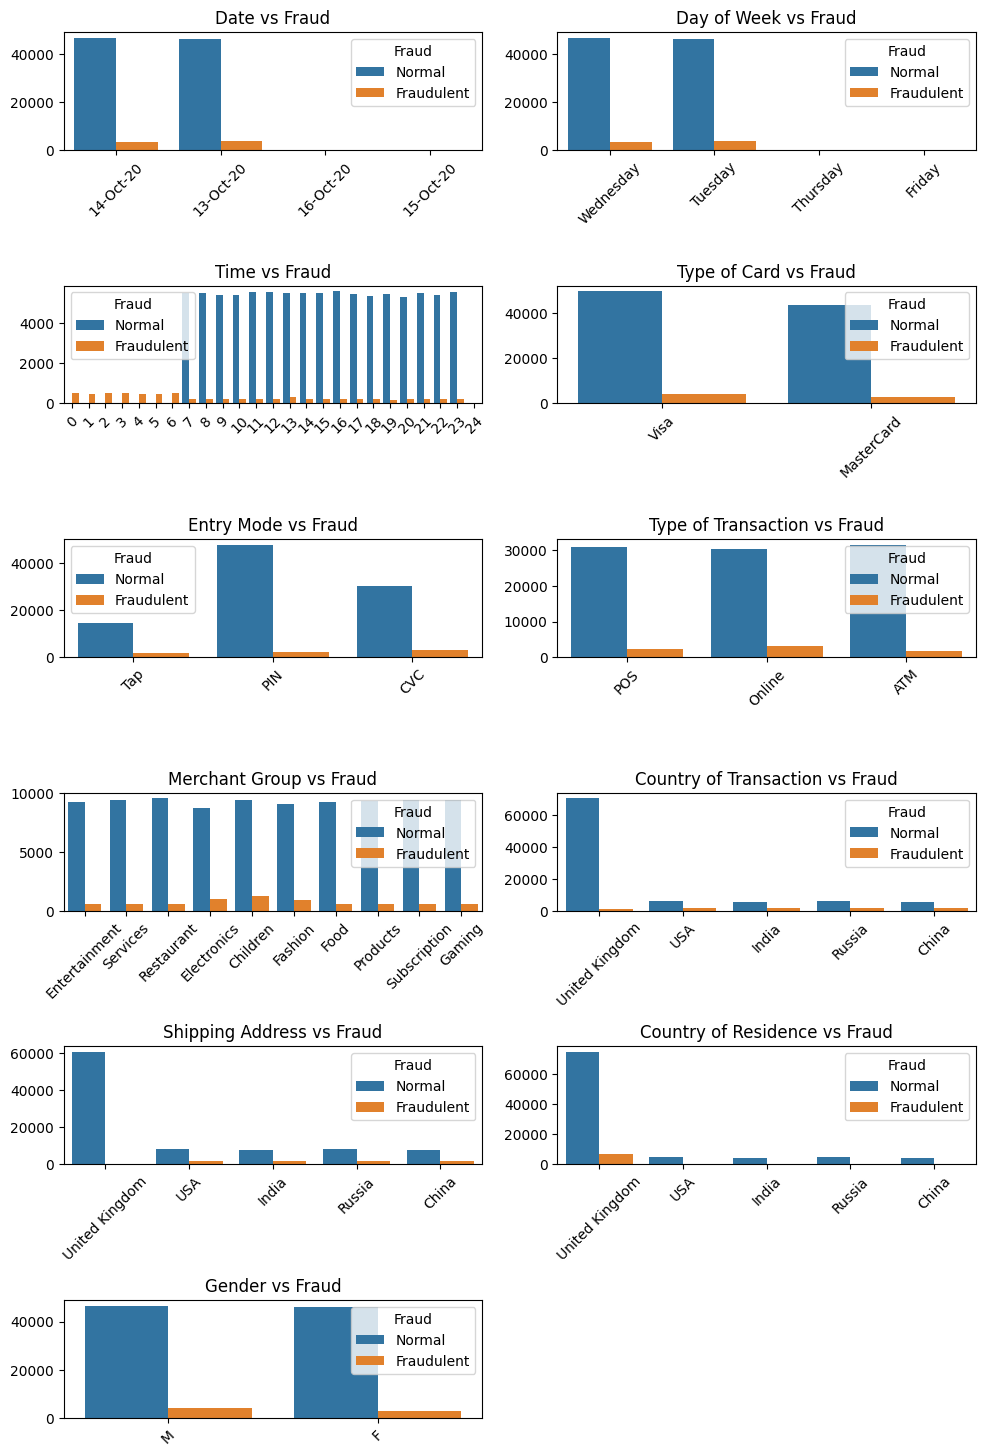

In [ ]:
# Step 1: Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load the data
path = "/content/drive/MyDrive/CreditCardData.csv"
df = pd.read_csv(path)

# Step 3: Exclude 'Transaction ID' column
features = ['Date', 'Day of Week', 'Time', 'Type of Card', 'Entry Mode',
            'Type of Transaction', 'Merchant Group', 'Country of Transaction',
            'Shipping Address', 'Country of Residence', 'Gender', 'Bank', 'Fraud']

# Create a subset of the data with selected features
subset_data = df[features]

# Step 4: Set up a grid for subplots
fig, axes = plt.subplots(nrows=len(features)//2, ncols=2, figsize=(10, 15))

# Flatten the axes for easy iteration
axes = axes.flatten()

# Step 5: Create count plots for each feature
for i, feature in enumerate(features[:-1]):  # Exclude 'Fraud' column
    sns.countplot(x=feature, hue='Fraud', data=subset_data, ax=axes[i])

    # Set title and adjust layout
    axes[i].set_title(f'{feature} vs Fraud')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].legend(title='Fraud', labels=['Normal', 'Fraudulent'])

# Adjust layout
plt.tight_layout()

# Remove empty subplots (if any)
if len(features) % 2 != 0:
    fig.delaxes(axes[-1])

# Show the plot
plt.show()


In [ ]:
df.head()

,Transaction ID,Date,Day of Week,Time,Type of Card,Entry Mode,Amount,Type of Transaction,Merchant Group,Country of Transaction,Shipping Address,Country of Residence,Gender,Age,Bank,Fraud
0,#3577 209,14-Oct-20,Wednesday,19,Visa,Tap,£5,POS,Entertainment,United Kingdom,United Kingdom,United Kingdom,M,25.2,RBS,0
1,#3039 221,14-Oct-20,Wednesday,17,MasterCard,PIN,£288,POS,Services,USA,USA,USA,F,49.6,Lloyds,0
2,#2694 780,14-Oct-20,Wednesday,14,Visa,Tap,£5,POS,Restaurant,India,India,India,F,42.2,Barclays,0
3,#2640 960,13-Oct-20,Tuesday,14,Visa,Tap,£28,POS,Entertainment,United Kingdom,India,United Kingdom,F,51.0,Barclays,0
4,#2771 031,13-Oct-20,Tuesday,23,Visa,CVC,£91,Online,Electronics,USA,USA,United Kingdom,M,38.0,Halifax,1


In [ ]:
df.tail()

,Transaction ID,Date,Day of Week,Time,Type of Card,Entry Mode,Amount,Type of Transaction,Merchant Group,Country of Transaction,Shipping Address,Country of Residence,Gender,Age,Bank,Fraud
99995,#3203 892,13-Oct-20,Tuesday,22,MasterCard,Tap,£15,POS,Electronics,United Kingdom,United Kingdom,United Kingdom,F,53.8,Halifax,0
99996,#3304 849,14-Oct-20,Wednesday,23,MasterCard,PIN,£7,ATM,Children,Russia,Russia,Russia,M,45.0,Barclays,0
99997,#3532 129,13-Oct-20,Tuesday,11,MasterCard,PIN,£21,ATM,Subscription,United Kingdom,United Kingdom,United Kingdom,F,46.5,HSBC,0
99998,#3107 092,14-Oct-20,Wednesday,22,Visa,Tap,£25,POS,Products,United Kingdom,United Kingdom,United Kingdom,M,48.2,Barclays,0
99999,#3400 711,14-Oct-20,Wednesday,16,Visa,PIN,£226,POS,Restaurant,United Kingdom,United Kingdom,United Kingdom,M,31.7,Monzo,0


In [ ]:
#Dataset Informations
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Transaction ID          100000 non-null  object 
 1   Date                    100000 non-null  object 
 2   Day of Week             100000 non-null  object 
 3   Time                    100000 non-null  int64  
 4   Type of Card            100000 non-null  object 
 5   Entry Mode              100000 non-null  object 
 6   Amount                  99994 non-null   object 
 7   Type of Transaction     100000 non-null  object 
 8   Merchant Group          99990 non-null   object 
 9   Country of Transaction  100000 non-null  object 
 10  Shipping Address        99995 non-null   object 
 11  Country of Residence    100000 non-null  object 
 12  Gender                  99996 non-null   object 
 13  Age                     100000 non-null  float64
 14  Bank                 

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

categorical_columns = ['Day of Week','Type of Card', 'Entry Mode', 'Type of Transaction',
                       'Merchant Group', 'Country of Transaction',
                       'Shipping Address', 'Country of Residence',
                       'Gender', 'Bank']

for column in categorical_columns:
  df[column] = label_encoder.fit_transform(df[column])


In [ ]:
df

,Transaction ID,Date,Day of Week,Time,Type of Card,Entry Mode,Amount,Type of Transaction,Merchant Group,Country of Transaction,Shipping Address,Country of Residence,Gender,Age,Bank,Fraud
0,#3577 209,14-Oct-20,3,19,1,2,£5,2,2,4,4,4,1,25.2,7,0
1,#3039 221,14-Oct-20,3,17,0,1,£288,2,8,3,3,3,0,49.6,4,0
2,#2694 780,14-Oct-20,3,14,1,2,£5,2,7,1,1,1,0,42.2,0,0
3,#2640 960,13-Oct-20,2,14,1,2,£28,2,2,4,1,4,0,51.0,0,0
4,#2771 031,13-Oct-20,2,23,1,0,£91,1,1,3,3,4,1,38.0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,#3203 892,13-Oct-20,2,22,0,2,£15,2,1,4,4,4,0,53.8,3,0
99996,#3304 849,14-Oct-20,3,23,0,1,£7,0,0,2,2,2,1,45.0,0,0
99997,#3532 129,13-Oct-20,2,11,0,1,£21,0,9,4,4,4,0,46.5,2,0
99998,#3107 092,14-Oct-20,3,22,1,2,£25,2,6,4,4,4,1,48.2,0,0


In [ ]:
#Data Cleaning and Validation
#Checking of missing values
print(df.isnull().sum())

Transaction ID            0
Date                      0
Day of Week               0
Time                      0
Type of Card              0
Entry Mode                0
Amount                    6
Type of Transaction       0
Merchant Group            0
Country of Transaction    0
Shipping Address          0
Country of Residence      0
Gender                    0
Age                       0
Bank                      0
Fraud                     0
dtype: int64


In [ ]:
#Handling of missing values
# Convert 'Amount' to numeric format and handle missing values
df['Amount'] = df['Amount'].str.replace('£', '').str.replace(',', '').astype(float)
df['Amount'].fillna(df['Amount'].median(), inplace=True)

mode_merchant_group = df['Merchant Group'].mode()[0]
df['Merchant Group'].fillna(mode_merchant_group, inplace=True)

df['Shipping Address'].fillna('Unknown', inplace=True)

mode_gender = df['Gender'].mode()[0]
df['Gender'].fillna(mode_gender, inplace=True)

In [ ]:
#Rechecking of Missing values
print(df.isnull().sum())

Transaction ID            0
Date                      0
Day of Week               0
Time                      0
Type of Card              0
Entry Mode                0
Amount                    0
Type of Transaction       0
Merchant Group            0
Country of Transaction    0
Shipping Address          0
Country of Residence      0
Gender                    0
Age                       0
Bank                      0
Fraud                     0
dtype: int64


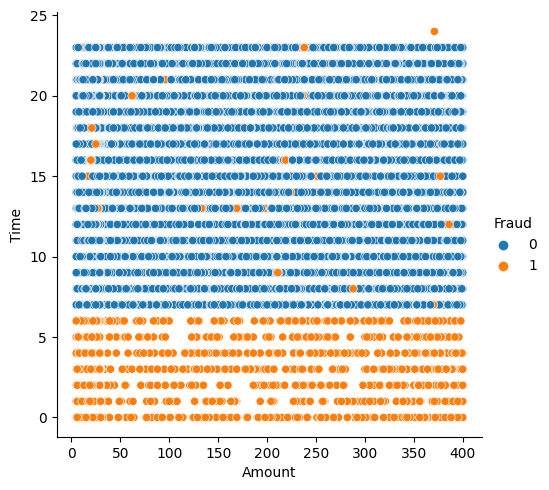

In [ ]:
sns.relplot(x= 'Amount', y='Time', hue='Fraud',data=df)

Text(0, 0.5, 'Frequency')

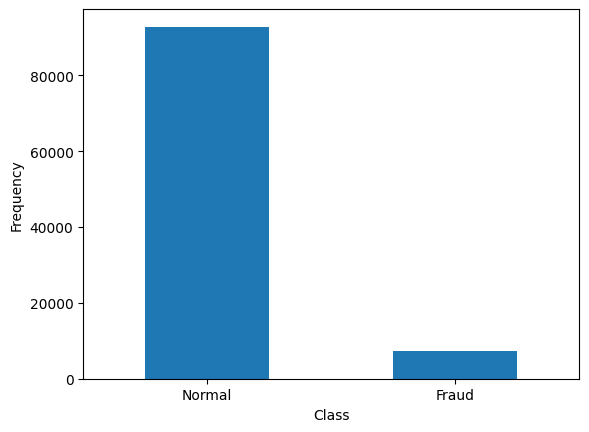

In [ ]:
count_Fraud=pd.value_counts(df['Fraud'],sort=True)
count_Fraud.plot(kind='bar',rot=0)
LABELS= ["Normal","Fraud"]
plt.title=("Transaction Class Distribtion")
plt.xticks(range(2), LABELS)

plt.xlabel("Class")

plt.ylabel("Frequency")

In [ ]:
#Correlation Matrix
corr=df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True, cmap='coolwarm')

<ipython-input-130-a8633d3ac9f9>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


In [ ]:
#Distribution of Legit transactions & fraudulent transactions
df['Fraud'].value_counts()

This dataset is highly unbalanced

0---> Normal Transactions

1--->Fraudulent Transactions

In [ ]:
#Separting the data for analysis
Normal=df[df.Fraud==0]
Fraudulent=df[df.Fraud==1]

In [ ]:
print(Normal.shape)
print(Fraudulent.shape)

In [ ]:
#Statistical Measures of the data
Normal.Amount.describe()

In [ ]:
Fraudulent.Amount.describe()

In [ ]:
#compare the values of both the transactions
df.groupby('Fraud').mean()

Under Sampling

Build a sample Data Set containing similar distribution for Noram Transaction and Fraudulent Transaction

No of Fraudulent Transactions-->7195

In [ ]:
Fraudulent_sample=Normal.sample(n=7195)

Concatenating two DataFrames

In [ ]:
newdataset=pd.concat([Fraudulent_sample,Fraudulent],axis=0)

In [ ]:
newdataset.head()

In [ ]:
newdataset.tail()

In [ ]:
newdataset['Fraud'].value_counts()

In [ ]:
newdataset.groupby('Fraud').mean()

Spliting the data into Features and Traget

In [ ]:
X=newdataset.drop(columns=['Transaction ID','Date','Fraud'],axis=1)
Y=newdataset['Fraud']

In [ ]:
print(X)

In [ ]:
print(Y)

Split the data into Training data and Testing data

In [ ]:
X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size=0.2, stratify=Y,random_state=2)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

Model Training

Logistic Regression

In [ ]:
model=LogisticRegression()

In [ ]:
#training the logistic regression model with trainning data
model.fit(X_train,Y_train)

Model Evaluation

In [ ]:
from os import access
#Accuracy score on Training Data
X_train_prediction=model.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction,Y_train)

In [ ]:
print('Accuracy on Training data: ',training_data_accuracy)

In [ ]:
#Accuracy on Testing Data
X_test_prediction=model.predict(X_test)
testing_data_accuracy=accuracy_score(X_test_prediction,Y_test)

In [ ]:
print('Accuracy on Testing data: ',testing_data_accuracy)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Calculate Confusion Matrix
conf_matrix_train = confusion_matrix(Y_train, X_train_prediction)

# Generate Classification Report
class_report_train = classification_report(Y_train, X_train_prediction)

print("Confusion Matrix (Training Data):")
print(conf_matrix_train)

print("\nClassification Report (Training Data):")
print(class_report_train)


In [ ]:
# Calculate Confusion Matrix
conf_matrix_test = confusion_matrix(Y_test, X_test_prediction)

# Generate Classification Report
class_report_test = classification_report(Y_test, X_test_prediction)

print("Confusion Matrix (Testing Data):")
print(conf_matrix_test)

print("\nClassification Report (Testing Data):")
print(class_report_test)

NameError: name 'confusion_matrix' is not defined

Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create a RandomForestClassifier instance
rf_model = RandomForestClassifier(random_state=2)

# Train the model on the training data
rf_model.fit(X_train, Y_train)

# Predict on the training data
Y_train_pred = rf_model.predict(X_train)

# Predict on the testing data
Y_test_pred = rf_model.predict(X_test)

# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Accuracy on training data
train_accuracy = accuracy_score(Y_train, Y_train_pred)

# Accuracy on testing data
test_accuracy = accuracy_score(Y_train, Y_train_pred)
# Confusion matrix on training data
confusion_mat = confusion_matrix(Y_train, Y_train_pred)

# Classification report on training data
class_report = classification_report(Y_train, Y_train_pred)

# Print the results
print(f"Accuracy on Training Data: {train_accuracy:.4f}")
print(f"Accuracy on Testing Data: {test_accuracy:.4f}")
print("\nConfusion Matrix:")
print(confusion_mat)
print("\nClassification Report:")
print(class_report)


# Confusion matrix on testing data
confusion_mat = confusion_matrix(Y_test, Y_test_pred)

# Classification report on testing data
class_report = classification_report(Y_test, Y_test_pred)

# Print the results
print(f"Accuracy on Training Data: {train_accuracy:.4f}")
print(f"Accuracy on Testing Data: {test_accuracy:.4f}")
print("\nConfusion Matrix:")
print(confusion_mat)
print("\nClassification Report:")
print(class_report)


Accuracy on Training Data: 1.0000
Accuracy on Testing Data: 1.0000

Confusion Matrix:
[[5756    0]
 [   0 5756]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5756
           1       1.00      1.00      1.00      5756

    accuracy                           1.00     11512
   macro avg       1.00      1.00      1.00     11512
weighted avg       1.00      1.00      1.00     11512

Accuracy on Training Data: 1.0000
Accuracy on Testing Data: 1.0000

Confusion Matrix:
[[1340   99]
 [  46 1393]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.93      0.95      1439
           1       0.93      0.97      0.95      1439

    accuracy                           0.95      2878
   macro avg       0.95      0.95      0.95      2878
weighted avg       0.95      0.95      0.95      2878

